## Loading and exploring data

Firstly, let's upload the data which we will deal with. For that we will need to import some libraries and modules that will be particularly useful.

In [1]:
from typing import Optional, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Defining constants
RANDOM_STATE = 12345

# Setting a visual theme for plots
plot_custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=plot_custom_params)

In [2]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data.sample(5, random_state=RANDOM_STATE)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
3183,0,33.0,39000.0,4,0
1071,0,50.0,43100.0,2,2
2640,1,39.0,42100.0,0,0
2282,0,20.0,34800.0,0,0
1595,0,41.0,40000.0,4,0


We see that we have 4 features and 1 target. Let's convert the names of the columns to the convenient format and look at the concise summary of the DataFrame.

In [3]:
insurance_data = insurance_data.rename(
    columns={
        "Пол": "sex",
        "Возраст": "age",
        "Зарплата": "salary",
        "Члены семьи": "family_members",
        "Страховые выплаты": "insurance_payout",
    }
)

In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               5000 non-null   int64  
 1   age               5000 non-null   float64
 2   salary            5000 non-null   float64
 3   family_members    5000 non-null   int64  
 4   insurance_payout  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


The conversions were completed successfully. Let's take a look at which columns are present in the DataFrame:

* `sex`: Gender of an insured person;
* `age`: Age of an insured person;
* `salary`: Salary of the insured person;
* `family_members`: Number of family members of an insured person;
* `insurance_payout`: Number of payments to an insured person over the past 5 years.

Next, we can notice that the data types in the `age` and `salary` columns are specified as `float64`. In fact, the type here should be integer, so let's fix it.

In [5]:
insurance_data["age"] = insurance_data["age"].astype("int64")
insurance_data["salary"] = insurance_data["salary"].astype("int64")

insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   sex               5000 non-null   int64
 1   age               5000 non-null   int64
 2   salary            5000 non-null   int64
 3   family_members    5000 non-null   int64
 4   insurance_payout  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


Let's move on. We don't see any missing values, which is a good sign. At the last stage of the data overview, we will build an appropriate plot for each column of the DataFrame.

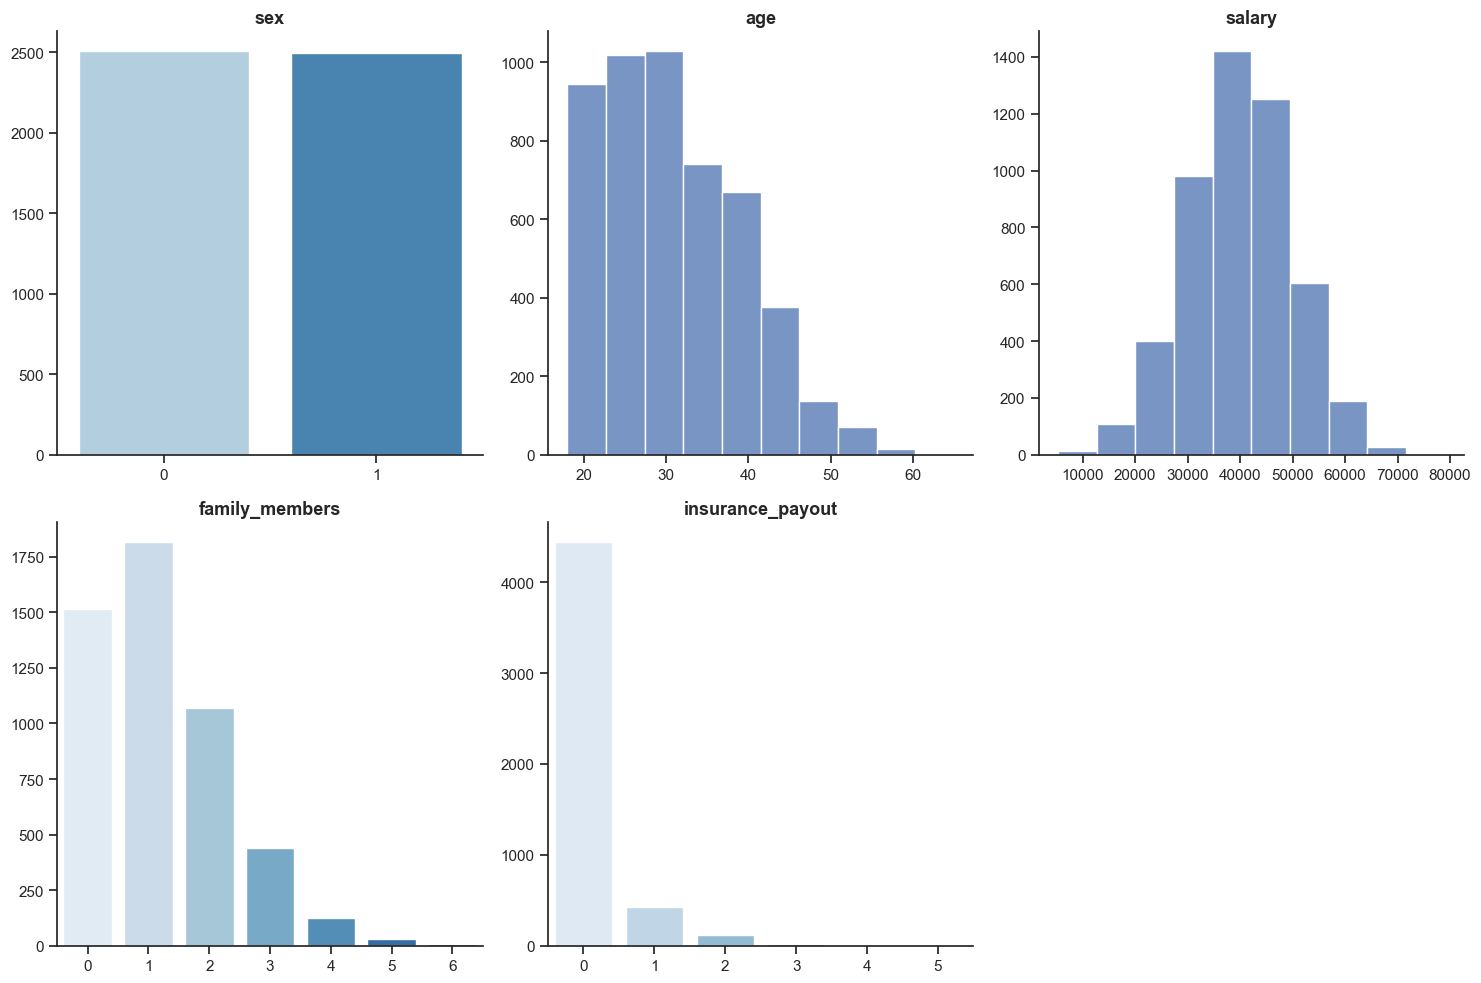

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.reshape(
    6,
)
axes[-1].axis("off")
for col, ax in zip(insurance_data.columns, axes):
    if len(insurance_data[col].unique()) < 10:
        f = sns.countplot(data=insurance_data, x=col, ax=ax, palette="Blues")
        ax.set(xlabel=None, ylabel=None)
        ax.set_title(col, fontweight="bold", fontsize=13)
        continue
    sns.histplot(data=insurance_data, x=col, bins=10, ax=ax)
    ax.set(xlabel=None, ylabel=None)
    ax.set_title(col, fontweight="bold", fontsize=13)
plt.tight_layout()
plt.show()

So, the first thing that is quite noticeable is that there is an equal number of men and women in the data, which is visible on the first plot. Furthermore, the distribution of salary in the data resembles a normal distribution, and the graphs of the remaining columns are clearly more skewed to the right.

**Conclusion**

At this small stage, we were able to download the data, study it, and visualize it. For more convenient work with data, the columns have been renamed and the data types in some columns have been changed. By constructing histograms, we were able to clearly see with what data the study is to be conducted.

## Matrix multiplication

Now let's move on to the matrices themselves. In this case, the question is whether the quality of linear regression will change if the features are multiplied by an invertible matrix. To do this, first let's separate the features from the target.

In [7]:
features = insurance_data.drop("insurance_payout", axis=1)
target = insurance_data["insurance_payout"]

Now, let's create an invertible matrix. This can be done by generating a random matrix using the `normal()` method from `random` module of `numpy` library. Additionally, we will ensure reproducibility of the results by specifying `seed(RANDOM_STATE)`. The matrix should be square of size $4 \times 4$, since we have 4 features. Besides, the matrix of features is of size $5000 \times 4$ so  after the multiplication operation it will remain of the same dimensions of $5000 \times 4$.

In [8]:
features_matrix = features.values
features_matrix.shape

(5000, 4)

In [9]:
# Generating a random invertible matrix
np.random.seed(RANDOM_STATE)
invertible_matrix = np.random.normal(size=(features.shape[1], features.shape[1]))

print("Initial matrix:")
print(invertible_matrix)

# Verifying matrix invertibility
try:
    inverted_matrix = np.linalg.inv(invertible_matrix)
except np.linalg.LinAlgError as err:
    if "Singular matrix" in str(err):
        print("\nInverted matrix:")
        print(np.empty_like(invertible_matrix))
        print(f"\nInitial matrix determinant: {np.linalg.det(invertible_matrix):.2f}")
else:
    print("\nInverted matrix:")
    print(inverted_matrix)
    print(f"\nInitial matrix determinant: {np.linalg.det(invertible_matrix):.2f}")

Initial matrix:
[[-0.20470766  0.47894334 -0.51943872 -0.5557303 ]
 [ 1.96578057  1.39340583  0.09290788  0.28174615]
 [ 0.76902257  1.24643474  1.00718936 -1.29622111]
 [ 0.27499163  0.22891288  1.35291684  0.88642934]]

Inverted matrix:
[[-1.31136747  0.3921804   0.18868055 -0.67088287]
 [ 1.75872714  0.14106138 -0.17773045  0.79787127]
 [-0.41702659 -0.22854768  0.3550602   0.33039819]
 [ 0.58912996  0.19073027 -0.5545481   0.6259302 ]]

Initial matrix determinant: -3.03


We managed to generate a random matrix of the required dimensions. As mentioned earlier, after multiplying the feature matrix by such a matrix, we will retain the dimensions of the original feature matrix, which we will continue to use in linear regression.

In order to answer the question about the linear regression and its quality, let's consider two situations in more detail from a mathematical point of view:

**Case 1:** *Features are **not multiplied** by an invertible matrix;*

**Case 2:** *Features are **multiplied** by an invertible matrix.*

Let's remember a solution for finding an optimal combination of linear regression parameters which can be computed based on minimizing $MSE$ metric by solving the following training problem:

$$
    w = \arg\min_w MSE(Xw, y)
$$

$$
    \Downarrow
$$

$$
    w = (X^{T} X)^{-1} X^{T} y,
$$
where $X$ - features matrix, $y$ - target vector, $w$ - linear regression parameters vector. This is a formula for finding the solution in case when features are not multiplied by any other matrix so here we just fit a simple linear regression (**Case 1**).

Now, let's consider a situtation when we do multiply features matrix by an invertible matrix $A$ (**Case 2**). In such a case we will have to compute the following vector of optimal parameters $w'$:

$$
    w' = ((\underbrace{X A}_\text{$X'$})^{T} (\underbrace{X A}_\text{$X'$}))^{-1} (\underbrace{X A}_\text{$X'$})^{T} y,
$$

Actually, the only change we have made to the formula is that we simply changed features matrix $X$ to a new matrix derived from a multiplication operation $X'$. Let's dig deeper into the formula:

$$
    w' = (X'^{T} X')^{-1} (X')^{T} y
$$

$$
    w' = ((X A)^{T} (X A))^{-1} (X A)^{T} y
$$

$$
    w' = (A^{T} X^{T} X A)^{-1} (X A)^{T} y
$$

$$
    w' = (A^{T} (X^{T} X) A)^{-1} (X A)^{T} y
$$

$$
    w' = (A^{T} (X^{T} X) A)^{-1} A^{T} X^{T} y
$$

$$
    w' = A^{-1} (X^{T} X)^{-1} (A^{T})^{-1} A^{T} X^{T} y
$$

$$
\Downarrow
$$

$$
    w' = A^{-1} (X^{T} X)^{-1} \underbrace{(A^{T})^{-1} A^{T}}_\text{$E$} X^{T} y
$$

$$
    w' = A^{-1} (X^{T} X)^{-1} X^{T} y
$$

$$
    w' = A^{-1} \underbrace{(X^{T} X)^{-1} X^{T} y}_\text{$w$}
$$

After the transformations, we notice that we have come to the original formula for the optimal vector of weights in linear regression, where we get the following relationship between the regression parameters in the original problem and the transformed one:

$$
    w' = A^{-1} w
$$

Now, let's find out how it will affect $R^2$ metric. It can be computed as follows:

$$
    R^2 = 1 - \frac{MSE_{model}}{MSE_{average}},
$$

where $MSE_{model}$ - *Mean Squared Error* of the model, а $MSE_{average}$ - *Mean Squared Error* of the model that produces constant predictions as average of target. In fact, the denominator will be a fixed number, since the average value of the target will be used as predictions, that is, it will not depend on the predictions made by the model. What will really depend on the predictions is $MSE_{model}$, whose value is calculated as follows:

$$
    MSE = \frac{1}{N} \sum_{i=1}^{N} (target_{i} - prediction_{i})^2,
$$

where $N$ - number of objects, $target_{i}$ - values of target for $i$-th object and  $prediction_{i}$ - prediction for $i$-th object. In other words, we need to look at how predictions are calculated in the original problem and the transformed one in order to be able to assert the difference or similarity of quality metrics in two situations.

Predictions can be computed as follows:

$$
    a = X w,
$$

where $a$ - predictions vector. Now, let's look at predictions for the transformed problem:

$$
    a' = X' w'
$$

$$
    a' = X \underbrace{A A^{-1}}_\text{$E$} w
$$

$$
    \Downarrow
$$

$$
    a' = X w,
$$

$$
    \Downarrow
$$

$$
    a = a'
$$

So, we got that the predictions in the original and transformed problems will coincide, that is, the values of $MSE_{model}$ will coincide, and since $MSE_{average}$ does not change between the variants, we will have approximately equal values of the metric $R^2$. 

Now let's check the calculations made earlier and write code that will check the metric values in these two tasks. To begin with, let's compare the predictions.

In [10]:
# Linear Regression (Case 1)
lin_reg_base = LinearRegression()
lin_reg_base.fit(features, target)
predictions_base = lin_reg_base.predict(features)
pd.Series(predictions_base, index=target.index)

0       0.511727
1       0.684316
2       0.093734
3      -0.222589
4       0.065084
          ...   
4995    0.028390
4996    0.253367
4997   -0.256970
4998   -0.190992
4999    0.049050
Length: 5000, dtype: float64

In [11]:
# Transforming features
features_matrix_transformed = features_matrix @ invertible_matrix

# Linear Regression (Case 2)
lin_reg_transformed = LinearRegression()
lin_reg_transformed.fit(features_matrix_transformed, target)
predictions_transformed = lin_reg_transformed.predict(features_matrix_transformed)
pd.Series(predictions_transformed, index=target.index)

0       0.511727
1       0.684316
2       0.093734
3      -0.222589
4       0.065084
          ...   
4995    0.028390
4996    0.253367
4997   -0.256970
4998   -0.190992
4999    0.049050
Length: 5000, dtype: float64

We see that the predictions are quite close to each other, which confirms the calculations that we made earlier. Now let's look at the values of the parameters of the regressions.

In [12]:
# Printing Linear Regression parameters (Case 1)
w = lin_reg_base.coef_
print(w)

[ 7.92580563e-03  3.57083050e-02 -1.70081903e-07 -1.35676627e-02]


In [13]:
# Printing Linear Regression parameters (Case 2)
w_transformed = inverted_matrix.dot(w)
print(w_transformed)
print(lin_reg_transformed.coef_)

[ 0.01271273  0.00815117 -0.01594911  0.00298767]
[ 0.01271273  0.00815117 -0.01594911  0.00298767]


Again, we see that the calculations are correct and the coefficients are different in the two problems. Finally, let's look at the values of the quality metric.

In [14]:
# Comparing R2-score
print("R2 (Case 1): {:.4f}".format(r2_score(target, predictions_base)))
print("R2 (Case 2): {:.4f}".format(r2_score(target, predictions_transformed)))

R2 (Case 1): 0.4249
R2 (Case 2): 0.4249


**Conclusion**

At this stage, we investigated the question of the effect of multiplication of the feature matrix by the invertible matrix. It turned out that the regression coefficients in the original and transformed problems will be different, but the predictions in both cases will be almost identical. This fact allows us to assert the similarity of metric values in these two variants of linear regression.

## Data conversion algorithm

Now let's move on to developing such a data conversion algorithm that will protect the company's customer data as much as possible. The bottom line will be that we will multiply the feature matrix by a specially composed invertible matrix. Let's propose the following algorithm.

**Algorithm:**

* The initial invertible matrix will be generated based on standard normal distribution $\mathcal{N}(0, 1)$;
* The matrix will change or not change its sign based on a randomly generated standard logistic number from $Logistic(0, 1)$;
* The resulting matrix will be premultiplied with the matrix of features.

**Rationale for the algorithm:**

This method was proposed due to the fact that there is a random factor here, that is, after each obfuscation of the feature matrix, a different result will be generated. The quality metric will not change in this case, because, as it was mathematically deduced earlier, when multiplying the feature matrix by any invertible matrix, we will still get the same predictions and, consequently, close values of the quality metric.

**Conclusion**

At this stage, a data transformation algorithm was proposed to protect the company's customer data. Thanks to the randomness, as well as a series of matrix transformations and conditions, we will be able to protect the data from recovery as much as possible.

## Encoding algorithm

Now, let's try to program such an algorithm proposed in the previous section. For that, we will create `Obfuscator()` class that will have three methods:

* `__init__()` => Initializing an instance;
* `mask_data()` => Obfuscating data with features;
* `restore_data()` => Restoring data with features.

In [15]:
class Obfuscator(object):
    """Data obfuscation implementation.

    Attributes:
        random_state: None or an integer indicating
            calibrating random number generator.
    """

    def __init__(self, random_state: Optional[int] = None) -> None:
        """Initializes an instance based on random state.

        Args:
            random_state: Defines if an instance should
                control for randomness.
        """
        self.random_state = random_state

    def mask_data(self, data: pd.DataFrame) -> Union[pd.DataFrame, None]:
        """Obfuscates the data using matrix operations.

        Args:
            data: DataFrame to be obfuscated.
        """
        matrix = data.values
        # Generating a matrix to be used in obfuscation
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.obfuscating_matrix = np.random.normal(
            size=(matrix.shape[1], matrix.shape[1])
        )
        # Making additional adjustments to a matrix
        rand_logist_num = np.random.logistic()
        self.obfuscating_matrix = (
            -self.obfuscating_matrix if rand_logist_num > 0 else self.obfuscating_matrix
        )
        # Verifying invertibility of the matrix
        try:
            inverted_obfuscating_matrix = np.linalg.inv(self.obfuscating_matrix)
        except np.linalg.LinAlgError as err:
            print(err)
        else:
            # Computing obfuscated matrix
            obfuscated_matrix = np.dot(matrix, self.obfuscating_matrix)
            # Converting a matrix to DataFrame
            obfuscated_data = pd.DataFrame(
                data=obfuscated_matrix, index=data.index, columns=data.columns
            )

            return obfuscated_data

    def restore_data(self, data: pd.DataFrame) -> pd.DataFrame:
        """Restores obfuscated data back to its original state.

        Args:
            data: DataFrame with obfuscated data.
        """
        obfuscated_matrix = data.values
        # Matrix operation to restore data
        restored_matrix = obfuscated_matrix.dot(np.linalg.inv(self.obfuscating_matrix))
        # Converting a matrix to DataFrame
        restored_data = pd.DataFrame(
            data=restored_matrix,
            index=data.index,
            columns=data.columns,
        )
        # Fixing output format
        restored_data = restored_data.apply(
            lambda column: column.round(2).astype("int64")
        )

        return restored_data

We can now test the structure we have written above. Firstly, we will create an instance of the class and mask the data with features.

In [16]:
# Obfuscating features data
obfuscator = Obfuscator(random_state=RANDOM_STATE)
features_obfuscated = obfuscator.mask_data(data=features)
features_obfuscated.sample(5, random_state=RANDOM_STATE)

,sex,age,salary,family_members
3183,30057.850862,48657.852763,39288.862573,-50539.779915
1071,33243.711676,53791.465256,43417.212539,-55851.269636
2640,32452.310831,52529.724173,42405.775923,-54560.476324
2282,26801.300964,43403.796943,35052.047801,-45102.859674
1595,30842.599674,49915.434746,40296.795194,-51833.747055


Now, let's restore original data.

In [17]:
# Restoring original features data
features_restored = obfuscator.restore_data(data=features_obfuscated)
features_restored.sample(5, random_state=RANDOM_STATE)

,sex,age,salary,family_members
3183,0,33,39000,4
1071,0,50,43100,2
2640,1,39,42100,0
2282,0,20,34800,0
1595,0,41,40000,4


Let's compare it with the real data.

In [18]:
features.sample(5, random_state=RANDOM_STATE)

,sex,age,salary,family_members
3183,0,33,39000,4
1071,0,50,43100,2
2640,1,39,42100,0
2282,0,20,34800,0
1595,0,41,40000,4


Let's conduct one more verification and check if all values in these two DataFrames are indeed equal to each other.

In [19]:
# Verifying equality of all values in DataFrames
assert features.equals(features_restored) == True

Now, we can run the regressions again and compare the results.

In [20]:
lin_reg_obfuscated = LinearRegression()
lin_reg_obfuscated.fit(features_obfuscated, target)
predictions_obfuscated = lin_reg_obfuscated.predict(features_obfuscated)
pd.Series(predictions_obfuscated, index=target.index)

0       0.511727
1       0.684316
2       0.093734
3      -0.222589
4       0.065084
          ...   
4995    0.028390
4996    0.253367
4997   -0.256970
4998   -0.190992
4999    0.049050
Length: 5000, dtype: float64

In [21]:
pd.Series(predictions_base, index=target.index)

0       0.511727
1       0.684316
2       0.093734
3      -0.222589
4       0.065084
          ...   
4995    0.028390
4996    0.253367
4997   -0.256970
4998   -0.190992
4999    0.049050
Length: 5000, dtype: float64

In [22]:
print("R2 (Case 1): {:.4f}".format(r2_score(target, predictions_base)))
print("R2 (Case 2): {:.4f}".format(r2_score(target, predictions_obfuscated)))

R2 (Case 1): 0.4249
R2 (Case 2): 0.4249


**Conclusion**

At the final stage, we were able to develop a data transformation method that will not only reliably protect data, but also make the data recovery process extremely difficult. Based on the results of data modeling in linear regression, we again saw that the predictions and, consequently, the values of quality metrics have not changed.

## General conclusion

This study was devoted to the process of developing an algorithm for protecting customer data of an insurance company. At the initial stage, the data were studied and visualized. The issue of the influence of multiplication of features on an invertible matrix on the values of quality metrics $R^2$ was carefully considered. Further, we were able to offer a rather complex data transformation algorithm in order to exclude the possibility of restoring customer data. After implementing this algorithm, we did not see any differences in the values of the quality metric when modeling data with linear regression.